In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

plt.style.use('dark_background')

### IMPORT YF ###
import yfinance as yf

# Pull data for one stock ticker from Yahoo Finance

In [34]:
ticker = "MSTR"

start_date = "2000-01-01"
df = yf.download(ticker, start=start_date)
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,MSTR,MSTR,MSTR,MSTR,MSTR
Date,,,,,
2000-01-03,104.250000,115.500000,97.90625,115.500000,535800
2000-01-04,98.000000,114.125000,97.87500,104.875000,874600
2000-01-05,104.250000,105.875000,89.78125,99.500000,613800
2000-01-06,100.125000,108.062500,99.50000,107.500000,456600
2000-01-07,105.187500,108.500000,98.62500,102.468750,563000
...,...,...,...,...,...
2025-04-17,317.200012,320.000000,306.00000,313.890015,13472100
2025-04-21,317.760010,330.989990,309.00000,324.989990,16053200


# Deal with multi-index columns

In [36]:
df.columns

MultiIndex([( 'Close', 'MSTR'),
            (  'High', 'MSTR'),
            (   'Low', 'MSTR'),
            (  'Open', 'MSTR'),
            ('Volume', 'MSTR')],
           names=['Price', 'Ticker'])

In [37]:
# method 1
#df.columns = df.columns.droplevel(1)

# method 2 (this one is better)
df = df.xs(ticker, axis=1, level=1)
df

Price,Close,High,Low,Open,Volume
Date,,,,,
2000-01-03,104.250000,115.500000,97.90625,115.500000,535800
2000-01-04,98.000000,114.125000,97.87500,104.875000,874600
2000-01-05,104.250000,105.875000,89.78125,99.500000,613800
2000-01-06,100.125000,108.062500,99.50000,107.500000,456600
2000-01-07,105.187500,108.500000,98.62500,102.468750,563000
...,...,...,...,...,...
2025-04-17,317.200012,320.000000,306.00000,313.890015,13472100
2025-04-21,317.760010,330.989990,309.00000,324.989990,16053200
2025-04-22,343.029999,348.959991,327.01001,328.709991,24036500


# Basic plotting

<AxesSubplot:xlabel='Date'>

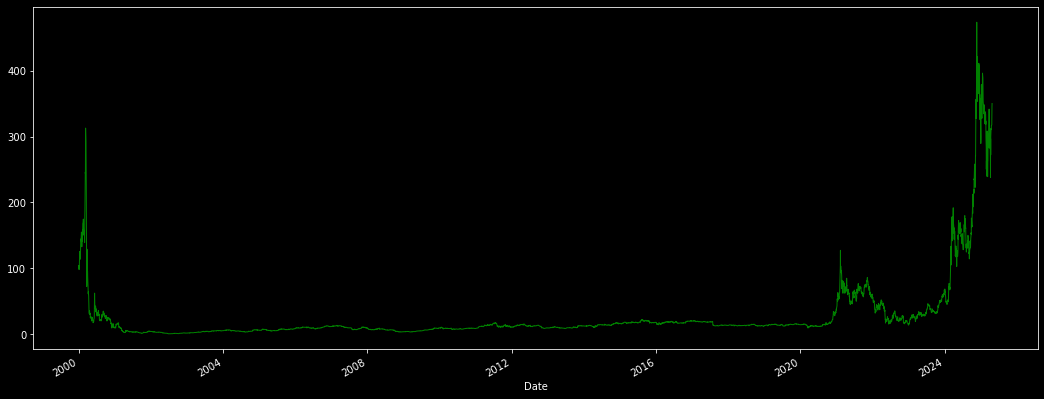

In [38]:
df.Close.plot(figsize=(18,7), linewidth=1, c='g')

# Get returns

<AxesSubplot:xlabel='Date'>

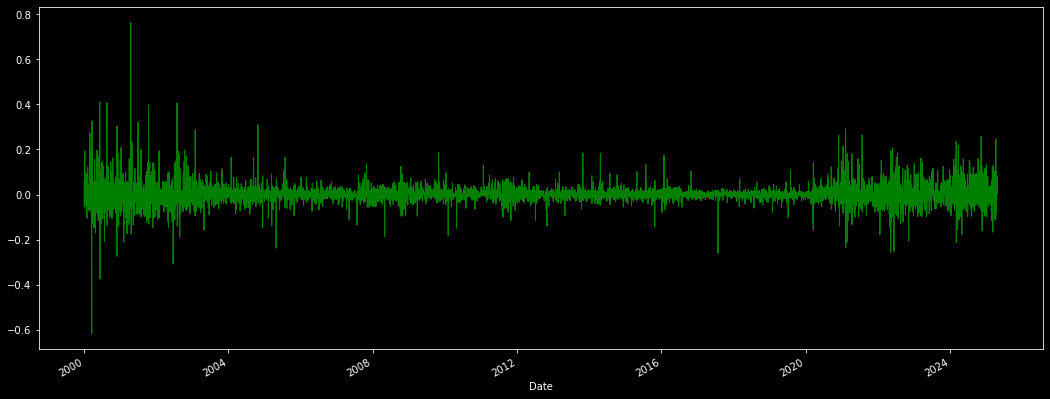

In [78]:
returns = df.Close.pct_change(periods=1).dropna()

returns.plot(figsize=(18,7), linewidth=1, c='g')
#returns.rolling(window=5*4*2).std().plot(c='r')

# Create sequences

In [79]:
# Create lagged sequences
window_size = 10

#perm = np.arange(window_size)
perm = np.random.permutation(np.arange(window_size))

X, y = [], []
dates = []
for i in range(len(returns) - window_size):
    #X.append(returns.iloc[i:i+window_size].values[perm])
    X.append(returns.iloc[i:i+window_size].values)
    y.append(returns.iloc[i+window_size])
    dates.append(returns.index[i+window_size])

X = np.array(X)
y = np.array(y)
dates = np.array(dates)

print(f"X shape: {X.shape}, y shape: {y.shape}")

X shape: (6355, 10), y shape: (6355,)


# Train / test split (time series)

In [80]:
# Simple index-based split
split_idx = int(len(X) * 0.8)
X_train, y_train, dates_train = X[:split_idx], y[:split_idx], dates[:split_idx]
X_test, y_test, dates_test = X[split_idx:], y[split_idx:], dates[split_idx:]

print(f"Train: X={X_train.shape}, y={y_train.shape}")
print(f"Test:  X={X_test.shape}, y={y_test.shape}")

Train: X=(5084, 10), y=(5084,)
Test:  X=(1271, 10), y=(1271,)


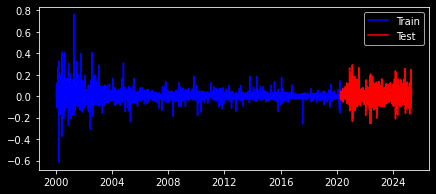

In [81]:
plt.figure(figsize=(7,3))
plt.plot( dates_train, y_train, 'b', label='Train' );
plt.plot( dates_test, y_test, 'r', label='Test' );
plt.legend()

# Modeling

## sklearn

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

models = [
    LinearRegression(),
    KNeighborsRegressor(n_neighbors=5, weights='uniform'),
    RandomForestRegressor(n_estimators=100, max_depth=5),
    RandomForestRegressor(n_estimators=100, max_depth=10),
    GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=2),
    GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3),
    GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5),
]

LinearRegression()
r2_train:   0.0078708
r2_test:    -0.018277
rmse_train: 0.042607
rmse_test:  0.060089


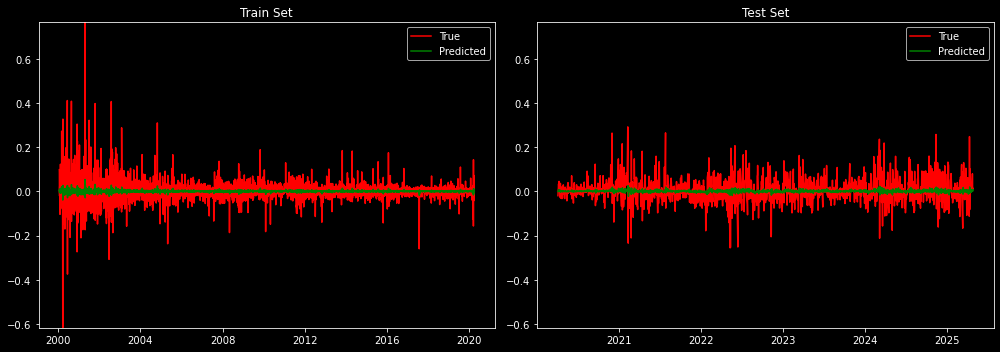

No handles with labels found to put in legend.
No handles with labels found to put in legend.


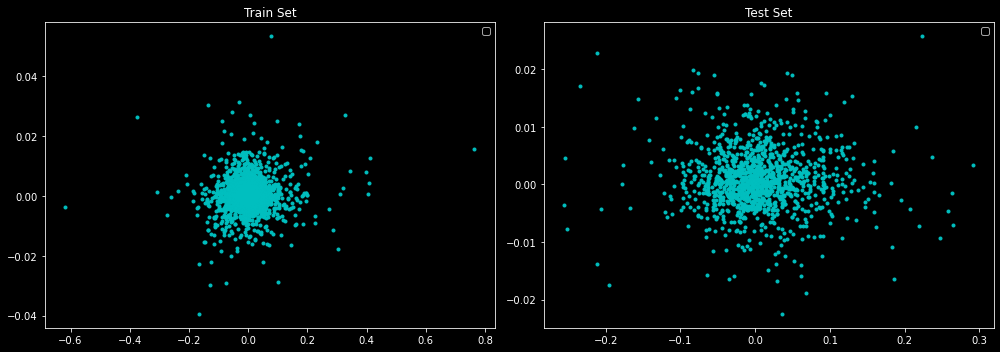


KNeighborsRegressor()
r2_train:   0.26248
r2_test:    -0.16896
rmse_train: 0.036735
rmse_test:  0.064382


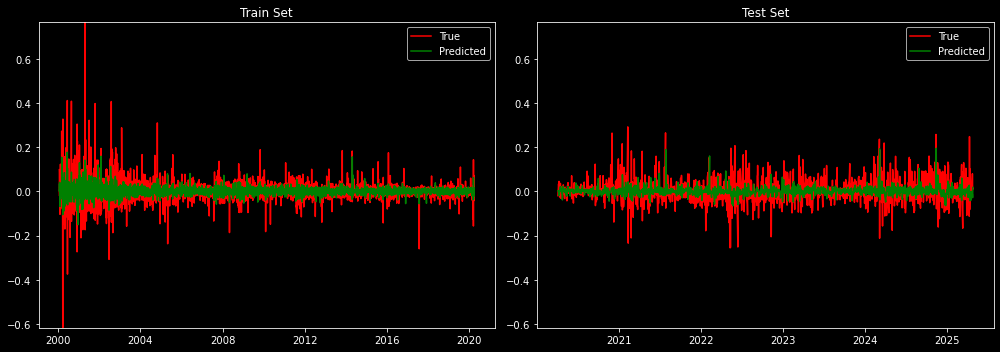

No handles with labels found to put in legend.
No handles with labels found to put in legend.


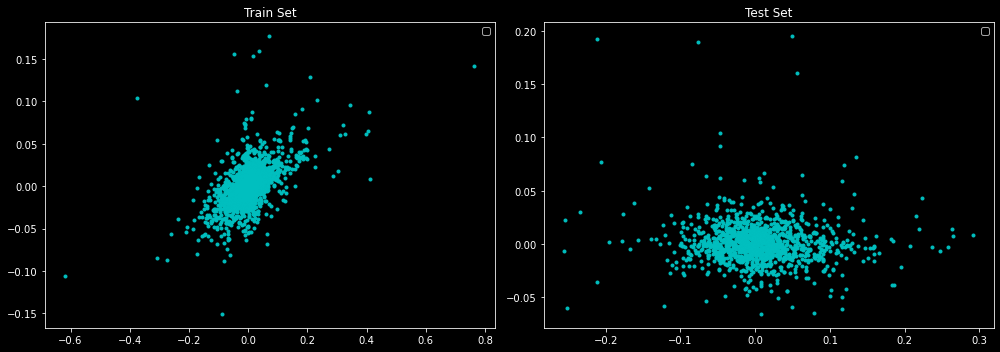


RandomForestRegressor(max_depth=5)
r2_train:   0.17327
r2_test:    -0.045435
rmse_train: 0.038893
rmse_test:  0.060885


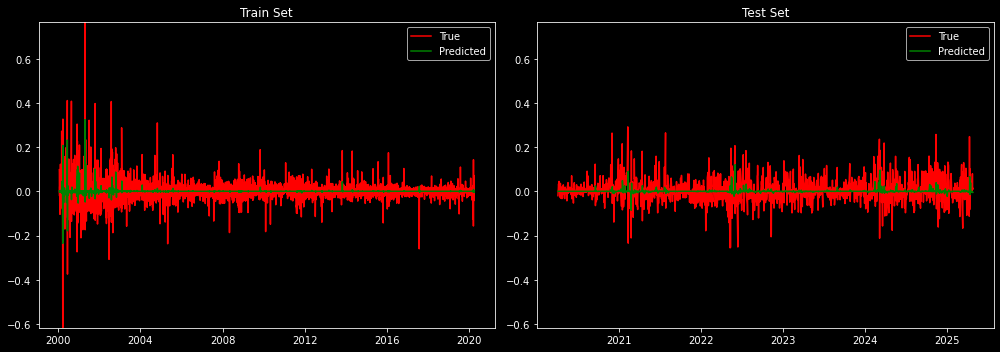

No handles with labels found to put in legend.
No handles with labels found to put in legend.


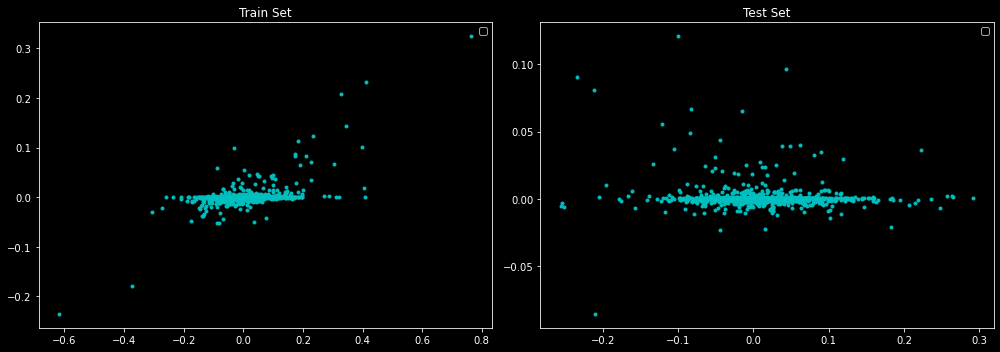


RandomForestRegressor(max_depth=10)
r2_train:   0.33126
r2_test:    -0.08127
rmse_train: 0.03498
rmse_test:  0.06192


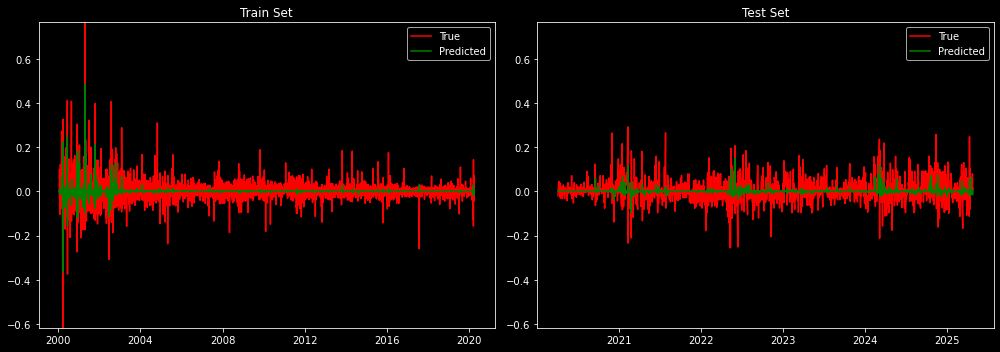

No handles with labels found to put in legend.
No handles with labels found to put in legend.


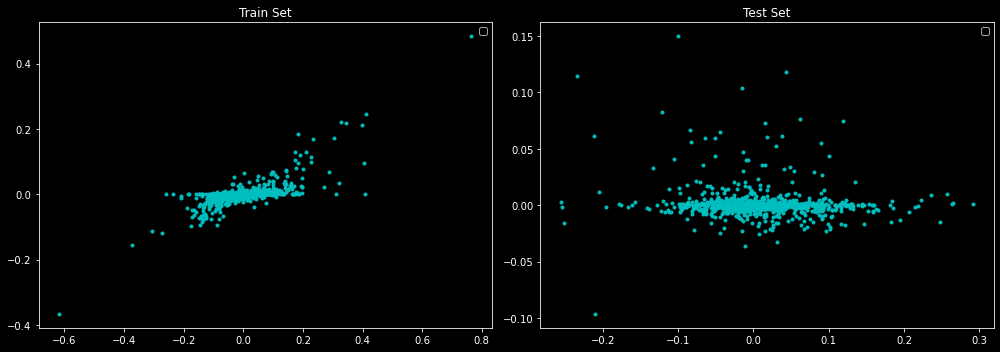


GradientBoostingRegressor(max_depth=2)
r2_train:   0.22566
r2_test:    -0.038999
rmse_train: 0.037641
rmse_test:  0.060698


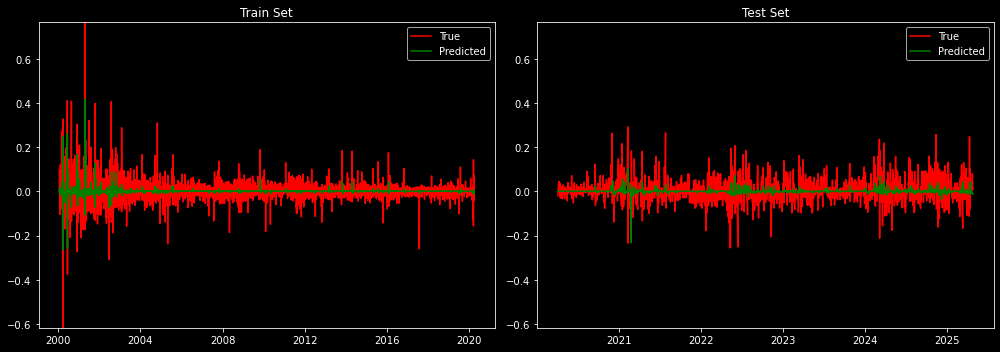

No handles with labels found to put in legend.
No handles with labels found to put in legend.


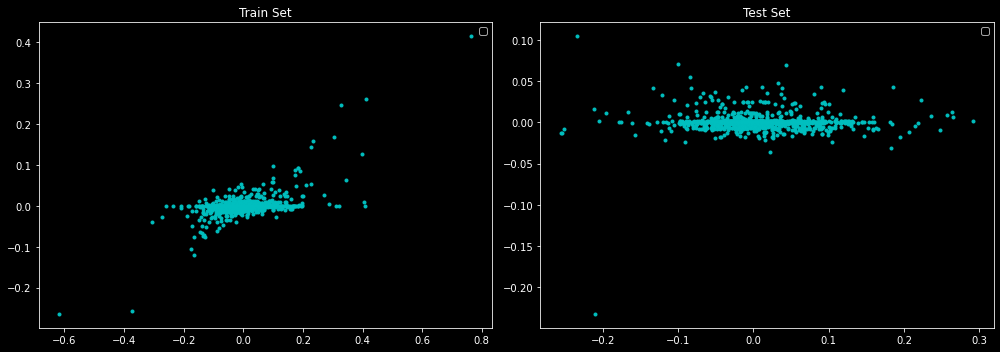


GradientBoostingRegressor()
r2_train:   0.34492
r2_test:    -0.096768
rmse_train: 0.034621
rmse_test:  0.062362


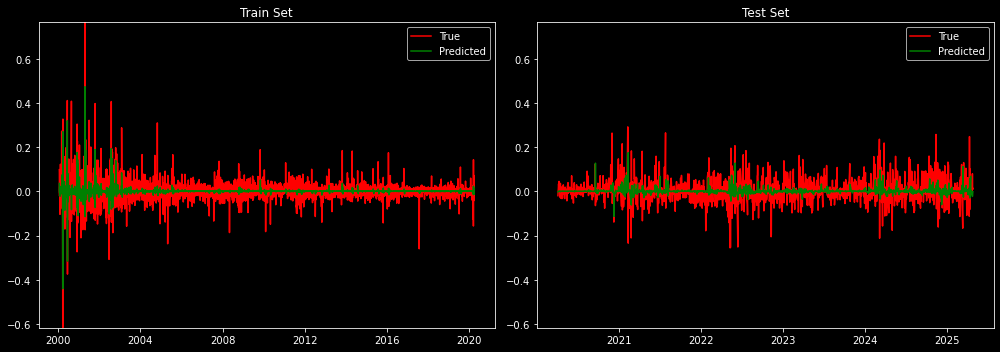

No handles with labels found to put in legend.
No handles with labels found to put in legend.


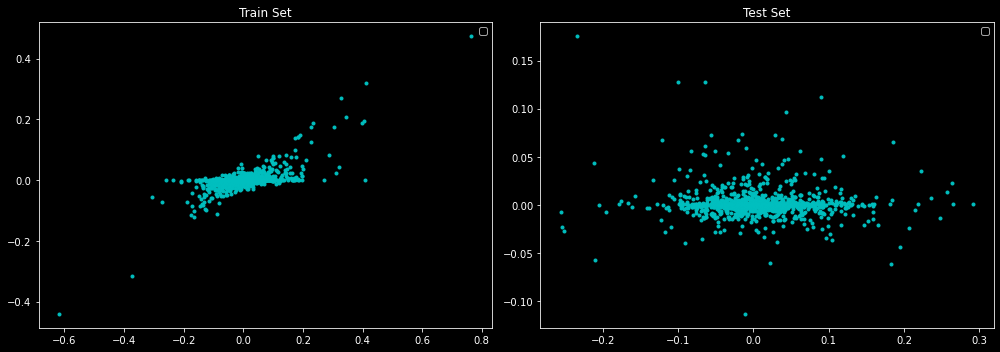


GradientBoostingRegressor(max_depth=5)
r2_train:   0.61315
r2_test:    -0.16194
rmse_train: 0.026605
rmse_test:  0.064189


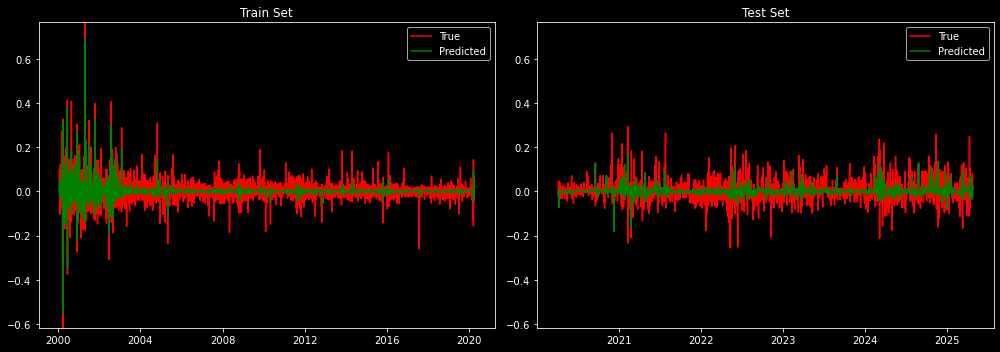

No handles with labels found to put in legend.
No handles with labels found to put in legend.


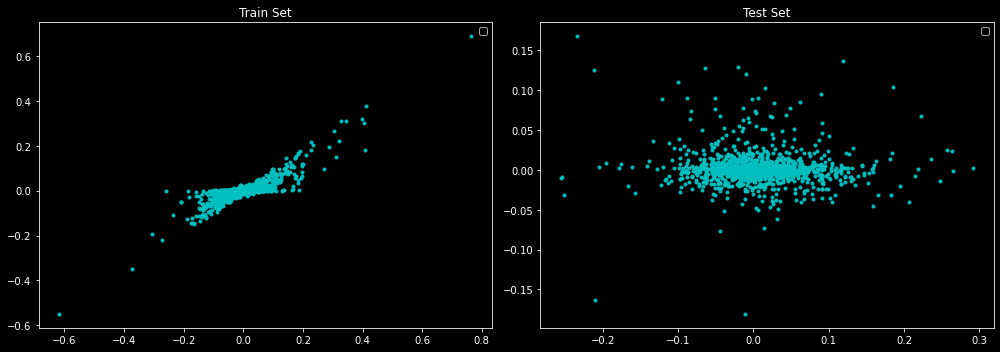

,r2_train,r2_test,rmse_train,rmse_test
model,,,,
LinearRegression(),0.007871,-0.018277,0.042607,0.060089
KNeighborsRegressor(),0.262481,-0.168960,0.036735,0.064382
RandomForestRegressor(max_depth=5),0.173274,-0.045435,0.038893,0.060885
RandomForestRegressor(max_depth=10),0.331260,-0.081270,0.034980,0.061920
GradientBoostingRegressor(max_depth=2),0.225658,-0.038999,0.037641,0.060698
GradientBoostingRegressor(),0.344920,-0.096768,0.034621,0.062362
GradientBoostingRegressor(max_depth=5),0.613151,-0.161944,0.026605,0.064189


In [83]:
from sklearn.metrics import r2_score, mean_squared_error

# Initialize list to hold results
results = []

for m in models:
    m.fit(X_train, y_train)
    
    y_train_pred = m.predict(X_train)
    y_test_pred  = m.predict(X_test)
    
    print(m)
    
    r2_train = r2_score(y_train, y_train_pred)
    print(f'r2_train:   {r2_train:.5}')

    r2_test = r2_score(y_test, y_test_pred)
    print(f'r2_test:    {r2_test:.5}')
    
    rmse_train = mean_squared_error(y_train, y_train_pred)**0.5
    print(f'rmse_train: {rmse_train:.5}')

    rmse_test = mean_squared_error(y_test, y_test_pred)**0.5
    print(f'rmse_test:  {rmse_test:.5}')

    # Store in results list
    results.append({
        'model': str(m),
        'r2_train': r2_train,
        'r2_test': r2_test,
        'rmse_train': rmse_train,
        'rmse_test': rmse_test
    })
    
    y_train_pred = pd.Series(y_train_pred, index=dates_train)
    y_test_pred  = pd.Series(y_test_pred, index=dates_test)

    # Calculate global y-axis limits
    y_min = min(y_train.min(), y_train_pred.min(), y_test.min(), y_test_pred.min())
    y_max = max(y_train.max(), y_train_pred.max(), y_test.max(), y_test_pred.max())

    # Plot train and test side by side with shared y limits
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    axs[0].plot(dates_train, y_train, 'r', label='True')
    axs[0].plot(y_train_pred, 'g', label='Predicted')
    axs[0].set_title('Train Set')
    axs[0].set_ylim(y_min, y_max)
    axs[0].legend()

    axs[1].plot(dates_test, y_test, 'r', label='True')
    axs[1].plot(y_test_pred, 'g', label='Predicted')
    axs[1].set_title('Test Set')
    axs[1].set_ylim(y_min, y_max)
    axs[1].legend()

    plt.tight_layout()
    plt.show()

    # Plot train and test side by side with shared y limits
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    axs[0].plot(y_train, y_train_pred.values, 'c.')
    axs[0].set_title('Train Set')
    axs[0].legend()

    axs[1].plot(y_test, y_test_pred.values, 'c.')
    axs[1].set_title('Test Set')
    axs[1].legend()

    plt.tight_layout()
    plt.show()
    
    print()
# end

# Create DataFrame
results_df = pd.DataFrame(results)

# Show or sort results
results_df = results_df.set_index("model")
results_df

## Keras

In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

### Dense model

In [85]:
dropout_rate = 0.1

model_dense  = Sequential([
    Input(shape=window_size),
    
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(dropout_rate),
    
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(dropout_rate),
    
    Dense(8, activation='relu'),
    
    Dense(1, activation='linear'),
])

# Define the optimizer with a custom learning rate
optimizer = Adam(learning_rate=0.01)

# Compile model
model_dense .compile(
    optimizer=optimizer,
    loss='mae',
)

# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=25,          # Stop after 5 epochs without improvement
    restore_best_weights=True  # Restore the best weights after stopping
)

model_dense .summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 32)                352       
                                                                 
 batch_normalization_10 (Bat  (None, 32)               128       
 chNormalization)                                                
                                                                 
 dropout_17 (Dropout)        (None, 32)                0         
                                                                 
 dense_34 (Dense)            (None, 16)                528       
                                                                 
 batch_normalization_11 (Bat  (None, 16)               64        
 chNormalization)                                                
                                                                 
 dropout_18 (Dropout)        (None, 16)              

In [86]:
history_dense = model_dense .fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,
    validation_data=(X_test, y_test),
    verbose=1,
    callbacks=[early_stopping]
)

Epoch 1/100
80/80 [==============================] - 1s 2ms/step - loss: 0.1324 - val_loss: 0.0424
Epoch 2/100
80/80 [==============================] - 0s 1ms/step - loss: 0.0272 - val_loss: 0.0426
Epoch 3/100
80/80 [==============================] - 0s 1ms/step - loss: 0.0264 - val_loss: 0.0427
Epoch 4/100
80/80 [==============================] - 0s 1ms/step - loss: 0.0250 - val_loss: 0.0424
Epoch 5/100
80/80 [==============================] - 0s 1ms/step - loss: 0.0246 - val_loss: 0.0426
Epoch 6/100
80/80 [==============================] - 0s 1ms/step - loss: 0.0240 - val_loss: 0.0424
Epoch 7/100
80/80 [==============================] - 0s 1ms/step - loss: 0.0240 - val_loss: 0.0427
Epoch 8/100
80/80 [==============================] - 0s 1ms/step - loss: 0.0238 - val_loss: 0.0425
Epoch 9/100
80/80 [==============================] - 0s 1ms/step - loss: 0.0237 - val_loss: 0.0424
Epoch 10/100
80/80 [==============================] - 0s 1ms/step - loss: 0.0239 - val_loss: 0.0424
Epoch 11/

40/40 [==============================] - 0s 563us/step
r2_train:   0.0081836
r2_test:    -0.0027502
rmse_train: 0.0426
rmse_test:  0.059629


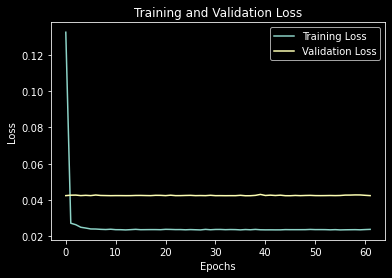

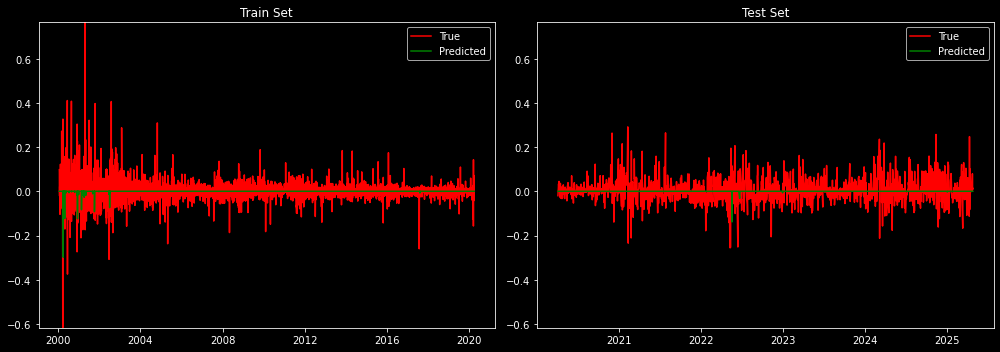

No handles with labels found to put in legend.
No handles with labels found to put in legend.


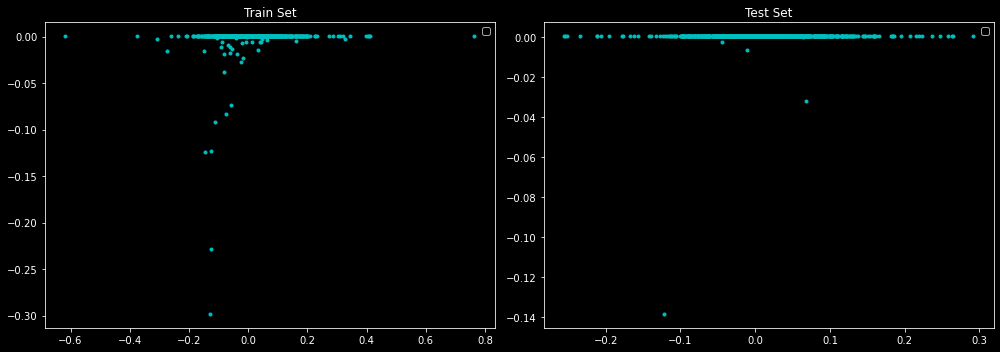

In [87]:
# Get predictions
y_train_pred = model_dense.predict(X_train)[:,0]
y_test_pred  = model_dense.predict(X_test)[:,0]

# Create a figure with two subplots side by side
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

# Left subplot: Training and Validation Loss
ax.plot(history_dense.history['loss'], label='Training Loss')
ax.plot(history_dense.history['val_loss'], label='Validation Loss')
ax.set_title('Training and Validation Loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend()

r2_train = r2_score(y_train, y_train_pred)
print(f'r2_train:   {r2_train:.5}')

r2_test = r2_score(y_test, y_test_pred)
print(f'r2_test:    {r2_test:.5}')

rmse_train = mean_squared_error(y_train, y_train_pred)**0.5
print(f'rmse_train: {rmse_train:.5}')

rmse_test = mean_squared_error(y_test, y_test_pred)**0.5
print(f'rmse_test:  {rmse_test:.5}')

y_train_pred = pd.Series(y_train_pred, index=dates_train)
y_test_pred  = pd.Series(y_test_pred, index=dates_test)

# Calculate global y-axis limits
y_min = min(y_train.min(), y_train_pred.min(), y_test.min(), y_test_pred.min())
y_max = max(y_train.max(), y_train_pred.max(), y_test.max(), y_test_pred.max())

# Plot train and test side by side with shared y limits
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].plot(dates_train, y_train, 'r', label='True')
axs[0].plot(y_train_pred, 'g', label='Predicted')
axs[0].set_title('Train Set')
axs[0].set_ylim(y_min, y_max)
axs[0].legend()

axs[1].plot(dates_test, y_test, 'r', label='True')
axs[1].plot(y_test_pred, 'g', label='Predicted')
axs[1].set_title('Test Set')
axs[1].set_ylim(y_min, y_max)
axs[1].legend()

plt.tight_layout()
plt.show()

# Plot train and test side by side with shared y limits
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].plot(y_train, y_train_pred.values, 'c.')
axs[0].set_title('Train Set')
axs[0].legend()

axs[1].plot(y_test, y_test_pred.values, 'c.')
axs[1].set_title('Test Set')
axs[1].legend()

plt.tight_layout()
plt.show()

### 1D CNN model

In [88]:
X_train_2 = X_train.reshape((X_train.shape[0], window_size, 1))
X_test_2 = X_test.reshape((X_test.shape[0], window_size, 1))

model_cnn = Sequential([
    Input(shape=(window_size,1)),
    Conv1D(16, 5, activation='relu', padding='same'),
    Conv1D(16, 5, activation='relu', padding='same'),
    Conv1D(16, 5, activation='relu', padding='same'),
    GlobalMaxPooling1D(),
    Dense(32, activation='relu'),
    Dropout(0.1),
    Dense(8, activation='relu'),
    Dense(1)
])

# Define the optimizer with a custom learning rate
optimizer = Adam(learning_rate=0.001)

# Compile model
model_cnn .compile(
    optimizer=optimizer,
    loss='mae',
)

# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=25,          # Stop after 5 epochs without improvement
    restore_best_weights=True  # Restore the best weights after stopping
)

model_cnn .summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_9 (Conv1D)           (None, 10, 16)            96        
                                                                 
 conv1d_10 (Conv1D)          (None, 10, 16)            1296      
                                                                 
 conv1d_11 (Conv1D)          (None, 10, 16)            1296      
                                                                 
 global_max_pooling1d_3 (Glo  (None, 16)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_37 (Dense)            (None, 32)                544       
                                                                 
 dropout_19 (Dropout)        (None, 32)                0         
                                                     

In [89]:
history_cnn = model_cnn.fit(
    X_train_2, y_train,
    epochs=100,
    batch_size=64,
    validation_data=(X_test_2, y_test),
    verbose=1,
    callbacks=[early_stopping]
)

Epoch 1/100
80/80 [==============================] - 1s 3ms/step - loss: 0.0235 - val_loss: 0.0424
Epoch 2/100
80/80 [==============================] - 0s 2ms/step - loss: 0.0235 - val_loss: 0.0424
Epoch 3/100
80/80 [==============================] - 0s 2ms/step - loss: 0.0235 - val_loss: 0.0424
Epoch 4/100
80/80 [==============================] - 0s 2ms/step - loss: 0.0235 - val_loss: 0.0425
Epoch 5/100
80/80 [==============================] - 0s 2ms/step - loss: 0.0235 - val_loss: 0.0424
Epoch 6/100
80/80 [==============================] - 0s 2ms/step - loss: 0.0235 - val_loss: 0.0424
Epoch 7/100
80/80 [==============================] - 0s 2ms/step - loss: 0.0234 - val_loss: 0.0424
Epoch 8/100
80/80 [==============================] - 0s 2ms/step - loss: 0.0235 - val_loss: 0.0424
Epoch 9/100
80/80 [==============================] - 0s 2ms/step - loss: 0.0235 - val_loss: 0.0426
Epoch 10/100
80/80 [==============================] - 0s 2ms/step - loss: 0.0235 - val_loss: 0.0424
Epoch 11/

40/40 [==============================] - 0s 613us/step
r2_train:   0.039776
r2_test:    -0.00028636
rmse_train: 0.041916
rmse_test:  0.059556


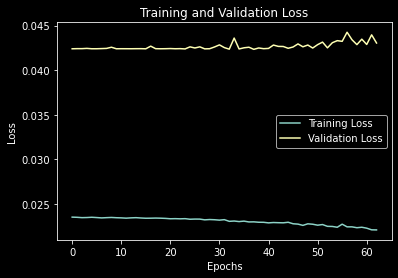

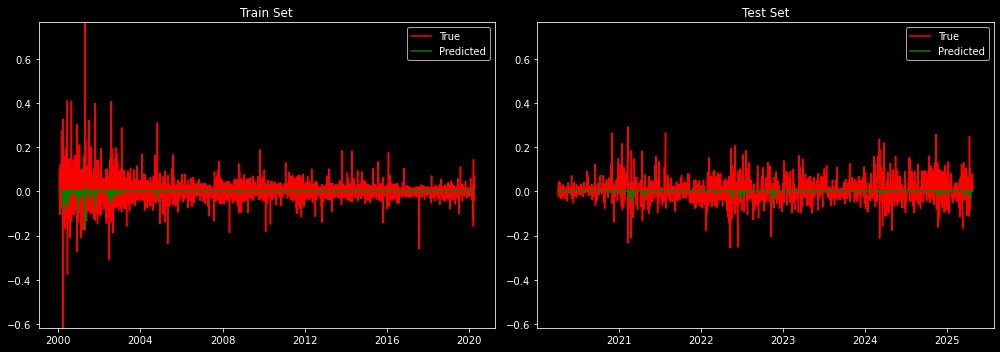

No handles with labels found to put in legend.
No handles with labels found to put in legend.


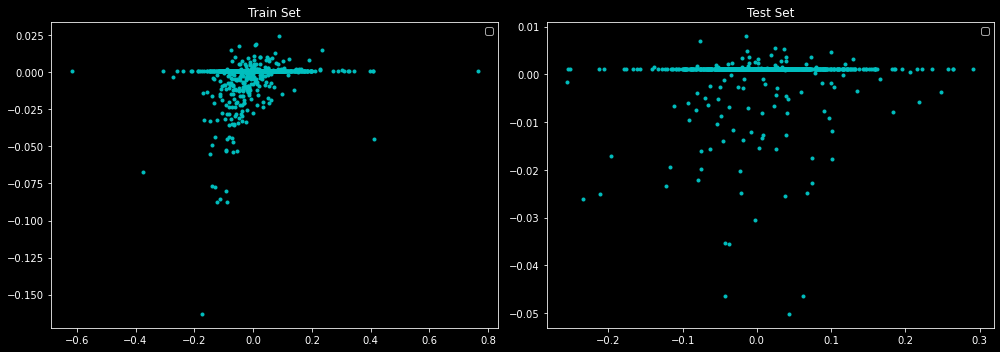

In [90]:
# Get predictions
y_train_pred = model_cnn.predict(X_train)[:,0]
y_test_pred  = model_cnn.predict(X_test)[:,0]

# Create a figure with two subplots side by side
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

# Left subplot: Training and Validation Loss
ax.plot(history_cnn.history['loss'], label='Training Loss')
ax.plot(history_cnn.history['val_loss'], label='Validation Loss')
ax.set_title('Training and Validation Loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend()

r2_train = r2_score(y_train, y_train_pred)
print(f'r2_train:   {r2_train:.5}')

r2_test = r2_score(y_test, y_test_pred)
print(f'r2_test:    {r2_test:.5}')

rmse_train = mean_squared_error(y_train, y_train_pred)**0.5
print(f'rmse_train: {rmse_train:.5}')

rmse_test = mean_squared_error(y_test, y_test_pred)**0.5
print(f'rmse_test:  {rmse_test:.5}')

y_train_pred = pd.Series(y_train_pred, index=dates_train)
y_test_pred  = pd.Series(y_test_pred, index=dates_test)

# Calculate global y-axis limits
y_min = min(y_train.min(), y_train_pred.min(), y_test.min(), y_test_pred.min())
y_max = max(y_train.max(), y_train_pred.max(), y_test.max(), y_test_pred.max())

# Plot train and test side by side with shared y limits
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].plot(dates_train, y_train, 'r', label='True')
axs[0].plot(y_train_pred, 'g', label='Predicted')
axs[0].set_title('Train Set')
axs[0].set_ylim(y_min, y_max)
axs[0].legend()

axs[1].plot(dates_test, y_test, 'r', label='True')
axs[1].plot(y_test_pred, 'g', label='Predicted')
axs[1].set_title('Test Set')
axs[1].set_ylim(y_min, y_max)
axs[1].legend()

plt.tight_layout()
plt.show()

# Plot train and test side by side with shared y limits
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].plot(y_train, y_train_pred.values, 'c.')
axs[0].set_title('Train Set')
axs[0].legend()

axs[1].plot(y_test, y_test_pred.values, 'c.')
axs[1].set_title('Test Set')
axs[1].legend()

plt.tight_layout()
plt.show()

### LSTM model

In [91]:
X_train_2 = X_train.reshape((X_train.shape[0], window_size, 1))
X_test_2 = X_test.reshape((X_test.shape[0], window_size, 1))

model_lstm = Sequential([
    Input(shape=(window_size, 1)),
    
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    BatchNormalization(),
    
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    
    Dense(32, activation='relu'),
    Dense(1)
])

# Define the optimizer with a custom learning rate
optimizer = Adam(learning_rate=0.001)

# Compile model
model_lstm .compile(
    optimizer=optimizer,
    loss='mae',
)

# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=25,          # Stop after 5 epochs without improvement
    restore_best_weights=True  # Restore the best weights after stopping
)

model_lstm .summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 10, 64)            16896     
                                                                 
 dropout_20 (Dropout)        (None, 10, 64)            0         
                                                                 
 batch_normalization_12 (Bat  (None, 10, 64)           256       
 chNormalization)                                                
                                                                 
 lstm_12 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_21 (Dropout)        (None, 32)                0         
                                                                 
 dense_40 (Dense)            (None, 32)                1056      
                                                     

In [92]:
history_lstm = model_lstm.fit(
    X_train_2, y_train,
    epochs=100,
    batch_size=64,
    validation_data=(X_test_2, y_test),
    verbose=1,
    callbacks=[early_stopping]
)

Epoch 1/100
80/80 [==============================] - 4s 15ms/step - loss: 0.0254 - val_loss: 0.0424
Epoch 2/100
80/80 [==============================] - 1s 8ms/step - loss: 0.0239 - val_loss: 0.0424
Epoch 3/100
80/80 [==============================] - 1s 8ms/step - loss: 0.0236 - val_loss: 0.0424
Epoch 4/100
80/80 [==============================] - 1s 8ms/step - loss: 0.0236 - val_loss: 0.0424
Epoch 5/100
80/80 [==============================] - 1s 8ms/step - loss: 0.0235 - val_loss: 0.0424
Epoch 6/100
80/80 [==============================] - 1s 8ms/step - loss: 0.0235 - val_loss: 0.0424
Epoch 7/100
80/80 [==============================] - 1s 8ms/step - loss: 0.0235 - val_loss: 0.0424
Epoch 8/100
80/80 [==============================] - 1s 8ms/step - loss: 0.0235 - val_loss: 0.0424
Epoch 9/100
80/80 [==============================] - 1s 8ms/step - loss: 0.0236 - val_loss: 0.0424
Epoch 10/100
80/80 [==============================] - 1s 8ms/step - loss: 0.0235 - val_loss: 0.0425
Epoch 11

40/40 [==============================] - 0s 2ms/step
r2_train:   -0.0089001
r2_test:    -0.0054712
rmse_train: 0.042965
rmse_test:  0.05971


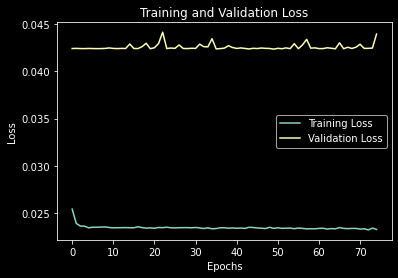

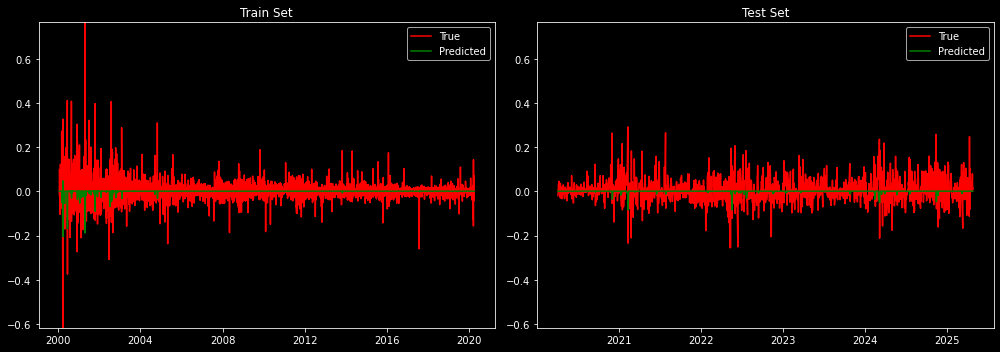

No handles with labels found to put in legend.
No handles with labels found to put in legend.


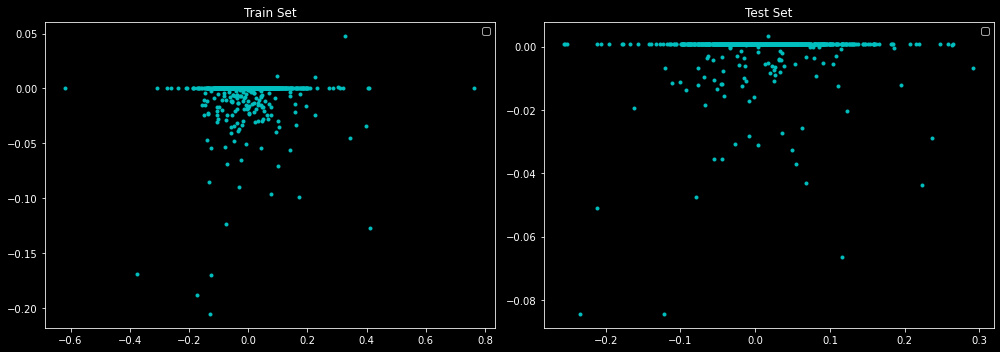

In [93]:
# Get predictions
y_train_pred = model_lstm.predict(X_train)[:,0]
y_test_pred  = model_lstm.predict(X_test)[:,0]

# Create a figure with two subplots side by side
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

# Left subplot: Training and Validation Loss
ax.plot(history_lstm.history['loss'], label='Training Loss')
ax.plot(history_lstm.history['val_loss'], label='Validation Loss')
ax.set_title('Training and Validation Loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend()

r2_train = r2_score(y_train, y_train_pred)
print(f'r2_train:   {r2_train:.5}')

r2_test = r2_score(y_test, y_test_pred)
print(f'r2_test:    {r2_test:.5}')

rmse_train = mean_squared_error(y_train, y_train_pred)**0.5
print(f'rmse_train: {rmse_train:.5}')

rmse_test = mean_squared_error(y_test, y_test_pred)**0.5
print(f'rmse_test:  {rmse_test:.5}')

y_train_pred = pd.Series(y_train_pred, index=dates_train)
y_test_pred  = pd.Series(y_test_pred, index=dates_test)

# Calculate global y-axis limits
y_min = min(y_train.min(), y_train_pred.min(), y_test.min(), y_test_pred.min())
y_max = max(y_train.max(), y_train_pred.max(), y_test.max(), y_test_pred.max())

# Plot train and test side by side with shared y limits
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].plot(dates_train, y_train, 'r', label='True')
axs[0].plot(y_train_pred, 'g', label='Predicted')
axs[0].set_title('Train Set')
axs[0].set_ylim(y_min, y_max)
axs[0].legend()

axs[1].plot(dates_test, y_test, 'r', label='True')
axs[1].plot(y_test_pred, 'g', label='Predicted')
axs[1].set_title('Test Set')
axs[1].set_ylim(y_min, y_max)
axs[1].legend()

plt.tight_layout()
plt.show()

# Plot train and test side by side with shared y limits
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].plot(y_train, y_train_pred.values, 'c.')
axs[0].set_title('Train Set')
axs[0].legend()

axs[1].plot(y_test, y_test_pred.values, 'c.')
axs[1].set_title('Test Set')
axs[1].legend()

plt.tight_layout()
plt.show()